In [ ]:
import numpy as np 
import os
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping
from tensorflow import keras
from tensorflow.keras import layers
%matplotlib inline

# Data Load and Analysis
### Imagewoof dataset is available on https://github.com/fastai/imagenette . 

 `print(imagewoof_info)` gives following Information regarding the dataset:

*   `image.shape` -> (shape=(None, None, 3) we recognize that the images contained in the dataset have different sizes
*   By num_classes=10 we know that all images belong to 10 classes, or categories
*   total_num_examples=12954 indicates the number of images
*   Also, the images are already divided into "train" and "validation" and contain 9025 and 3929 images, respectively.


In [ ]:
# Connect Google Colab with Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


tfds.core.DatasetInfo(
    name='image_folder',
    version=1.0.0,
    description='Generic image classification dataset.',
    homepage='https://www.tensorflow.org/datasets/catalog/image_folder',
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=tf.uint8),
        'image/filename': Text(shape=(), dtype=tf.string),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    total_num_examples=12954,
    splits={
        'train': 9025,
        'val': 3929,
    },
    supervised_keys=('image', 'label'),
    citation="""""",
    redistribution_info=,
)

(413, 500, 3) 8
(333, 500, 3) 8
(213, 255, 3) 8
(600, 800, 3) 2
Train
9025


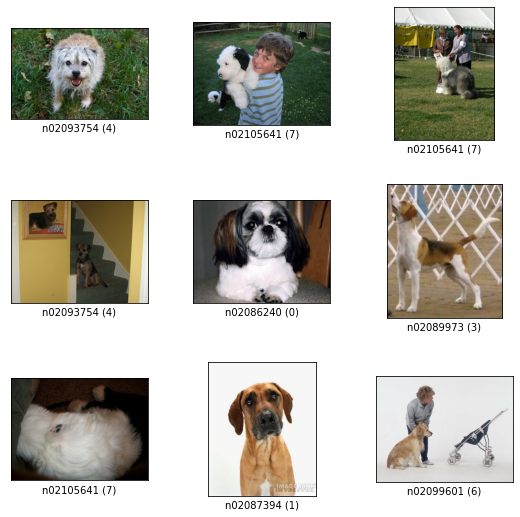

Test
3929


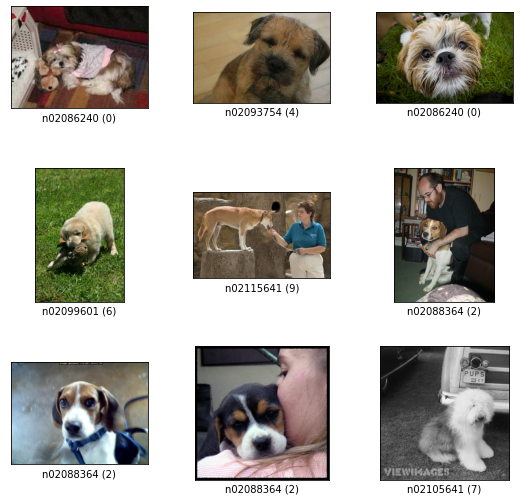

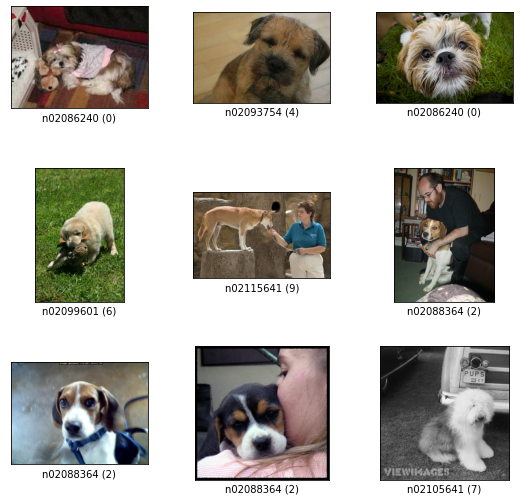

In [ ]:
# reference :- https://www.tensorflow.org/datasets/overview
batch_size = 64
#imagenette_builder = tfds.builder("imagewoof/full-size-v2")

data_dir = '/content/gdrive/MyDrive/Colab_Notebooks/CVDL_Project/imagewoof2'
imagewoof_builder = tfds.ImageFolder(data_dir) # ImageFolder creates a tf.data.Dataset reading the original image files.
'''print(imagenette_builder.info)  # num examples, labels... are automatically calculated
ds = builder.as_dataset(split='train',as_supervised=True, shuffle_files=True)
tfds.show_examples(ds, builder.info)'''


imagewoof_info = imagewoof_builder.info
print(imagewoof_info)

#imagenette_builder.download_and_prepare()
datasets = imagewoof_builder.as_dataset(as_supervised=True,shuffle_files=True)
(train_datasets,test_datasets)=imagewoof_builder.as_dataset(split=['train', 'val'],as_supervised=True, shuffle_files=True)
train_examples = imagewoof_info.splits['train'].num_examples
validation_examples = imagewoof_info.splits['val'].num_examples


ds= train_datasets.take(4)  # Only take a few example
for image, label in ds:  # example is (image, label)
  print(image.shape, tfds.as_numpy(label))


print("Train")
print(train_examples)
tfds.show_examples(train_datasets, imagewoof_builder.info)

print("Test")
print(validation_examples)
tfds.show_examples(test_datasets, imagewoof_builder.info)


image  label
0  [[[128, 110, 90], [127, 106, 87], [119, 98, 81...      2
1  [[[126, 145, 115], [126, 145, 115], [128, 144,...      1
2  [[[100, 93, 87], [88, 97, 94], [57, 86, 81], [...      1
3  [[[245, 237, 198], [247, 239, 200], [247, 242,...      2
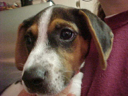
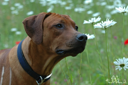
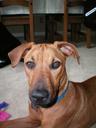
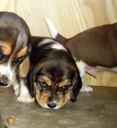

In [ ]:
tfds.as_dataframe(train_datasets.take(4), imagewoof_builder.info)

In [ ]:
info = imagewoof_builder.info
print(info.features)

FeaturesDict({
    'image': Image(shape=(None, None, 3), dtype=tf.uint8),
    'image/filename': Text(shape=(), dtype=tf.string),
    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
})


Finally, there are 10 classes to which the images are assigned.  `print(info.features['label'].names)` goves this information.
Look into the images and determine the class label .

https://github.com/fastai/imagenette shows Imagenet classes are (tench, English springer, cassette player, chain saw, church, French horn, garbage truck, gas pump, golf ball, parachute).

In [ ]:
print(info.features["label"].num_classes)
print(info.features["label"].names)
print(info.features["label"].int2str(1))  # Human readable version (1 -> 'n02087394'->'gas pump')
print(info.features["label"].str2int('n02087394'))
class_labels = [0,1,2,3,4,5,6,7,8,9] 
lbl_dict = dict(
  n02093754='Australian terrier', 
  n02089973='Border terrier', 
  n02099601='Samoyed', 
  n02087394='Beagle', 
  n02105641='Shih-Tzu', 
  n02096294='English foxhound', 
  n02088364='Rhodesian ridgeback', 
  n02115641='Dingo', 
  n02111889='Golden retriever', 
  n02086240='Old English sheepdog'
)

for i, value in lbl_dict.items():
  index=info.features["label"].str2int(i)
  print(index, value)
  class_labels[index]=value

print(class_labels) 

10
['n02086240', 'n02087394', 'n02088364', 'n02089973', 'n02093754', 'n02096294', 'n02099601', 'n02105641', 'n02111889', 'n02115641']
n02087394
1
4 Australian terrier
3 Border terrier
6 Samoyed
1 Beagle
7 Shih-Tzu
5 English foxhound
2 Rhodesian ridgeback
9 Dingo
8 Golden retriever
0 Old English sheepdog
['Old English sheepdog', 'Beagle', 'Rhodesian ridgeback', 'Border terrier', 'Australian terrier', 'English foxhound', 'Samoyed', 'Shih-Tzu', 'Golden retriever', 'Dingo']


In [ ]:
print(info.features.shape)
print(info.features.dtype)
print(info.features['image'].shape)
print(info.features['image'].dtype)

{'image': (None, None, 3), 'label': (), 'image/filename': ()}
{'image': tf.uint8, 'label': tf.int64, 'image/filename': tf.string}
(None, None, 3)
<dtype: 'uint8'>


In [ ]:
print(info.splits)
print(list(info.splits.keys()))

{'train': <tfds.core.SplitInfo num_examples=9025>, 'val': <tfds.core.SplitInfo num_examples=3929>}
['train', 'val']


# Preprocessing steps

1.   Resize all the images (128,128, 3)
2.   Normalize pixel values of each image so that they are all in a   range between 0 and 1. Normally the value of a pixel is between 0 and 255 (RGB color values), but the neural networks prefer to calculate with values between 0 and 1, so we will simply divide each pixel value by 255.




In [ ]:
size_image = 64
resize_and_rescale = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.Resizing(size_image, size_image,crop_to_aspect_ratio=True),
  tf.keras.layers.experimental.preprocessing.Rescaling(1./255)
]) 

In [ ]:
train_datasets = train_datasets.map(
  lambda image,label: (resize_and_rescale(image, training=True),label)) 

In [ ]:
test_datasets = test_datasets.map(
  lambda image, label: (resize_and_rescale(image, training=False), label)) 

In [ ]:
for img, label in train_datasets.take(5):
  print(img.shape,label) 

(64, 64, 3) tf.Tensor(2, shape=(), dtype=int64)
(64, 64, 3) tf.Tensor(5, shape=(), dtype=int64)
(64, 64, 3) tf.Tensor(8, shape=(), dtype=int64)
(64, 64, 3) tf.Tensor(1, shape=(), dtype=int64)
(64, 64, 3) tf.Tensor(0, shape=(), dtype=int64)


In [ ]:
def plot_images(data, size=(20,20)):
  plt.figure(figsize=size)
  for i in range(25):
    for img, label in data.take(i+1):
      plt.subplot(5, 5, i + 1)
      plt.xticks([])
      plt.yticks([])
      plt.grid(True)
      plt.imshow(img, cmap=plt.cm.binary)
      plt.title(class_labels[label])
      plt.ylabel(img.shape)
  plt.show() 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


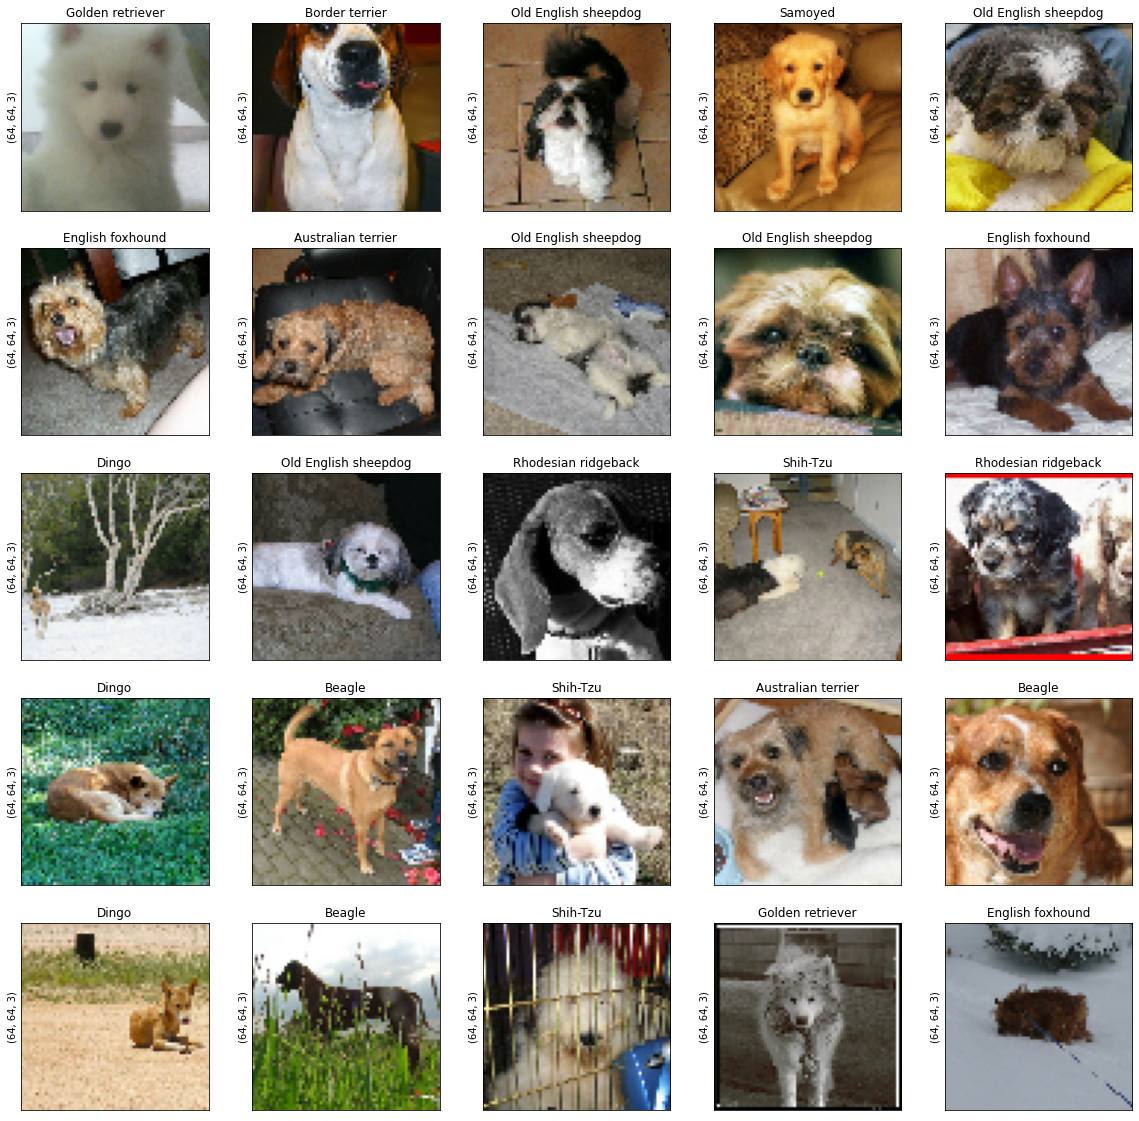

In [ ]:
plot_images(train_datasets) 

In [ ]:
# define data preparation
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
])

In [ ]:

train_datasets = train_datasets.map(
  lambda image,label: (data_augmentation(image,training=True),label))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


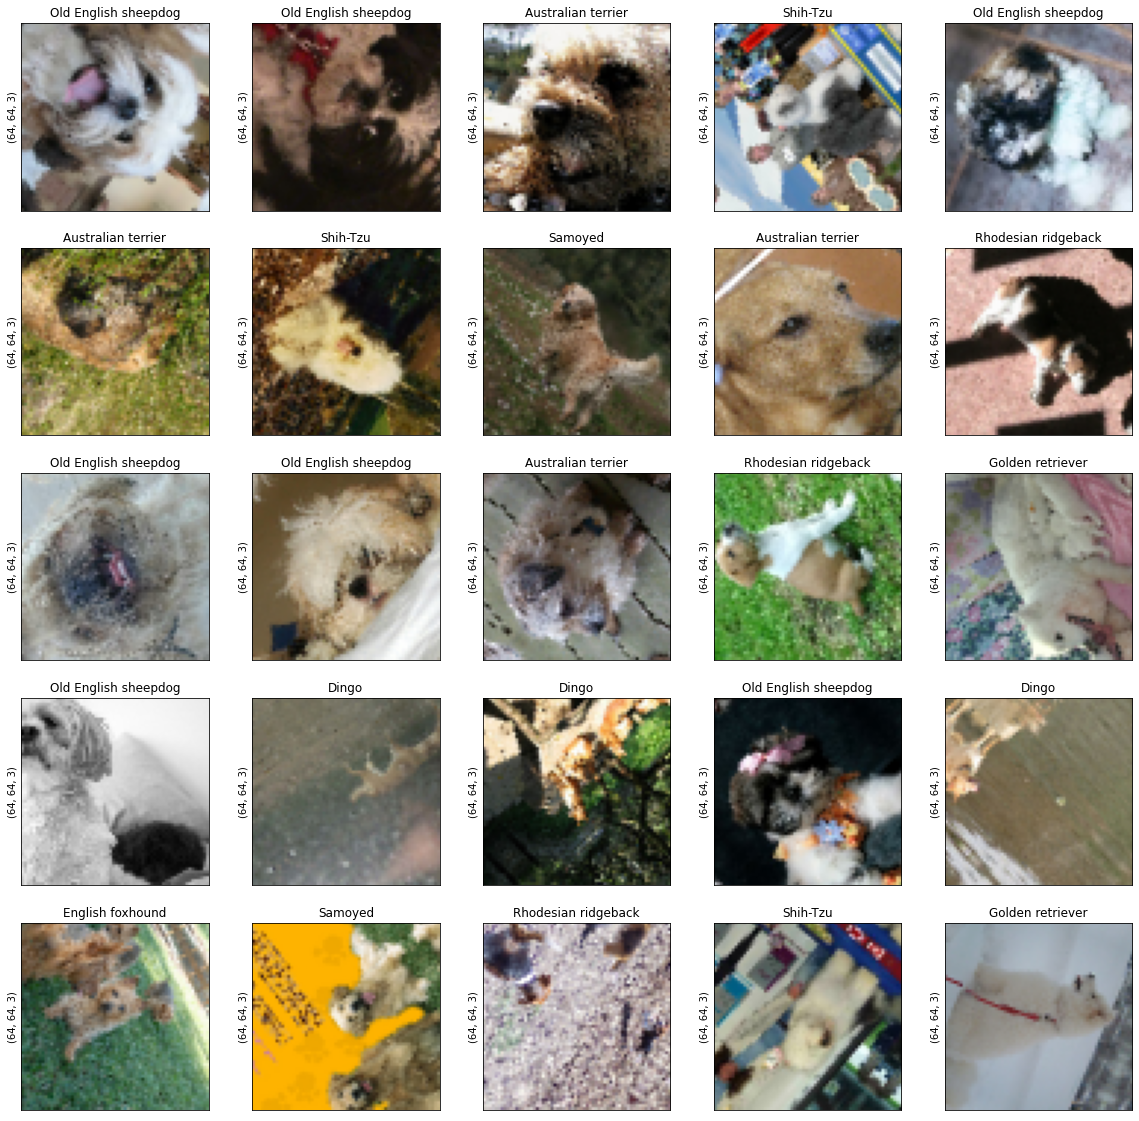

In [ ]:
plot_images(train_datasets)

# Model

In [ ]:
# patient early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
inputs = keras.Input(shape=(size_image, size_image, 3))
x= inputs
def residual_block(x, filters, pooling=False, residual_connection=True):
  residual = x
  if residual_connection:
    x = layers.Conv2D(filters, 3, activation="relu", padding="same")(x)
    x = layers.Conv2D(filters, 3, activation="relu", padding="same")(x)
  else:
    x = layers.Conv2D(filters, 3, activation="relu", padding="same")(x)
    x = layers.Conv2D(2*filters, 3, activation="relu", padding="same")(x)
  if pooling:
    x = layers.MaxPooling2D(2,strides=2, padding="valid")(x)
    residual = layers.Conv2D(filters, 1, strides=2)(residual)
  elif filters != residual.shape[-1]:
    residual = layers.Conv2D(filters, 1)(residual)
  if residual_connection:
    x = layers.add([x, residual])
  else:
    x=x
  return x

In [ ]:
x = residual_block(x, filters=128, pooling=True,residual_connection=False)
x = residual_block(x, filters=256, pooling=False,residual_connection=True)
x = residual_block(x, filters=512, pooling=True,residual_connection=False)
x = residual_block(x, filters=1024, pooling=False,residual_connection=True)
x = layers.MaxPool2D(8, strides=8,padding="valid")(x)
x= layers.Flatten()(x)
x=layers.Dropout(0.2)(x)
outputs = layers.Dense(10, activation="softmax",use_bias=True)(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.summary() 

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 64, 64, 3)]  0           []                               
                                                                                                  
 conv2d_12 (Conv2D)             (None, 64, 64, 128)  3584        ['input_2[0][0]']                
                                                                                                  
 conv2d_13 (Conv2D)             (None, 64, 64, 256)  295168      ['conv2d_12[0][0]']              
                                                                                                  
 max_pooling2d_3 (MaxPooling2D)  (None, 32, 32, 256)  0          ['conv2d_13[0][0]']              
                                                                                            

In [ ]:
train_batch = train_datasets.batch(64)

test_batch = test_datasets.batch(64) 

In [ ]:
for img, label in train_batch.take(1):
  print(img.shape,label) 

(64, 64, 64, 3) tf.Tensor(
[3 6 9 6 2 9 7 4 2 1 6 8 1 9 1 8 7 9 8 0 1 3 4 9 5 4 7 4 5 3 8 5 2 4 4 2 7
 9 4 9 4 2 1 2 2 1 9 6 0 0 3 9 9 9 6 7 4 5 0 8 1 8 2 8], shape=(64,), dtype=int64)


In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001,clipvalue=0.1),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy']) 


In [ ]:
history = model.fit(train_batch,epochs=100,validation_data=test_batch,callbacks=[es]) 

Epoch 1/100
142/142 [==============================] - 64s 417ms/step - loss: 2.3572 - accuracy: 0.1100 - val_loss: 2.3656 - val_accuracy: 0.1115
Epoch 2/100
142/142 [==============================] - 58s 406ms/step - loss: 2.2045 - accuracy: 0.1572 - val_loss: 2.1948 - val_accuracy: 0.1741
Epoch 3/100
142/142 [==============================] - 58s 407ms/step - loss: 2.1181 - accuracy: 0.2027 - val_loss: 2.2896 - val_accuracy: 0.1614
Epoch 4/100
142/142 [==============================] - 58s 407ms/step - loss: 2.0927 - accuracy: 0.2139 - val_loss: 2.3811 - val_accuracy: 0.2115
Epoch 5/100
142/142 [==============================] - 58s 406ms/step - loss: 2.0105 - accuracy: 0.2495 - val_loss: 2.1805 - val_accuracy: 0.1733
Epoch 6/100
142/142 [==============================] - 58s 407ms/step - loss: 2.0822 - accuracy: 0.2285 - val_loss: 1.9872 - val_accuracy: 0.2616
Epoch 7/100
142/142 [==============================] - 58s 406ms/step - loss: 1.9784 - accuracy: 0.2721 - val_loss: 1.9041 -

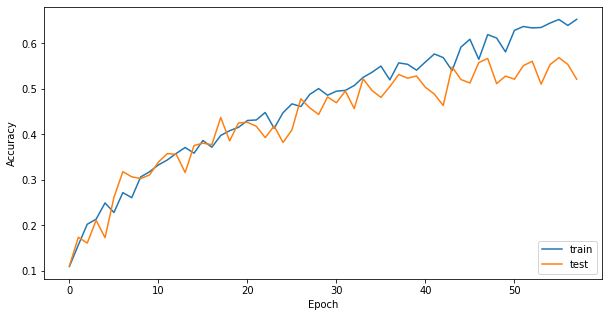

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label = 'test')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right') 

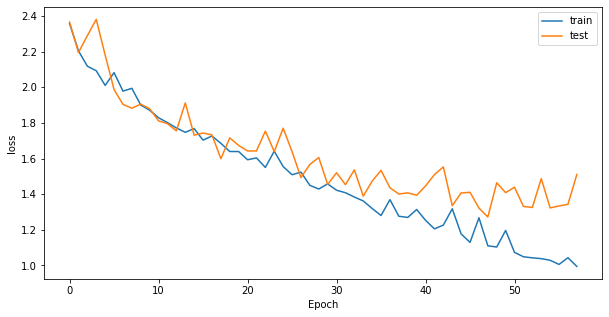

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label = 'test')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend(loc='upper right') 

In [ ]:
test_acc = model.evaluate(test_batch, verbose=2)
print('Test accuracy: ',test_acc[1]) 
print('Test loss: ',test_acc[0])


62/62 - 7s - loss: 1.5104 - accuracy: 0.5213 - 7s/epoch - 119ms/step
Test accuracy:  0.5212522149085999
Test loss:  1.5104459524154663


In [ ]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img, cmap=plt.cm.binary)
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_labels[predicted_label],
                                100*np.max(predictions_array),
                                class_labels[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

In [ ]:
labels =[]
labels_hat=[]
for image, label in test_batch:
  y_pred=model.predict(image)
  classes = np.argmax(y_pred,axis = 1)
  labels.extend(list(label.numpy()))
  labels_hat.extend(list(classes))

con_mat = tf.math.confusion_matrix(labels=labels, predictions=labels_hat).numpy()

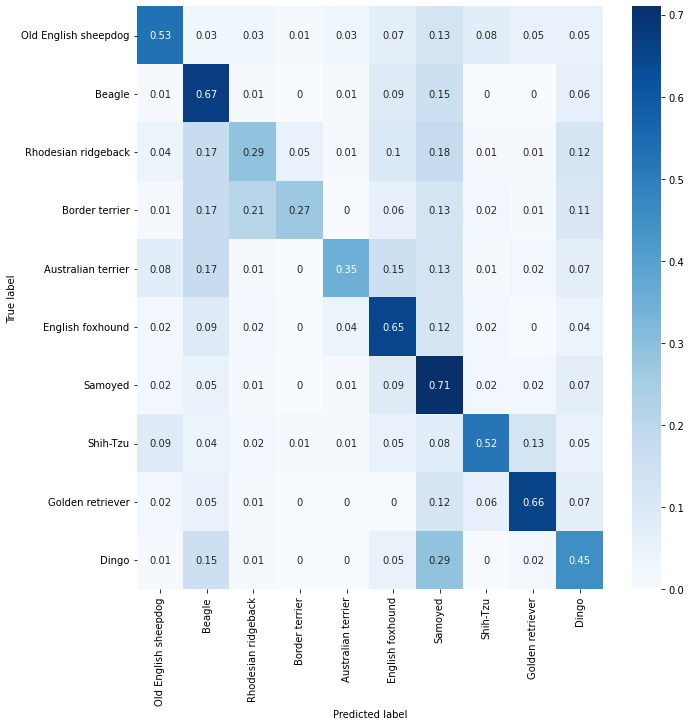

In [ ]:
import pandas as pd
import seaborn as sns

con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)

con_mat_df = pd.DataFrame(con_mat_norm,
                     index = class_labels, 
                     columns = class_labels)

figure = plt.figure(figsize=(10, 10))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
#reference:- https://www.tensorflow.org/tutorials/keras/classification
for test_images, test_labels in test_batch.take(5):  
  for l in range(len(label)):
    predictions = probability_model.predict(test_images)
    i = l
    plt.figure(figsize=(6,3))
    plt.subplot(1,2,1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(1,2,2)
    plot_value_array(i, predictions[i],  test_labels)
    plt.show()
  